In [1]:
pip install lxml

Note: you may need to restart the kernel to use updated packages.


In [2]:
from bs4 import BeautifulSoup
import pandas as pd
from splinter import Browser
import time
import numpy as np
import os
import csv
temp_data_url = "https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html"

In [3]:
executable_path = {'executable_path':"C:\Program Files\Google\Chrome\Application\chromedriver.exe"}
browser = Browser('chrome', **executable_path, headless=False)

In [4]:
table_md = pd.read_html(temp_data_url)

In [5]:
table_df = pd.DataFrame(table_md[0])
table_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [6]:
print(table_df['month'].nunique())


12


In [7]:
print(table_df['sol'].nunique())

1867


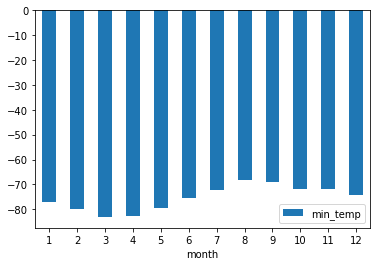

In [8]:
temps = table_df.groupby(by=['month'])["min_temp"].mean()
## print(table_df.groupby(by=['month'])["min_temp"].mean())
#print(temps)
#print(temps.min())
#low_temp = temps.sort_values('min_temp')
#low_temp
temps
temps_df = pd.DataFrame(temps)
# df
# chart = df.plot.bar(x='month', y='min_temp', rot=0)
# chart
temp_chart = temps_df.plot.bar(rot=0)
temp_chart

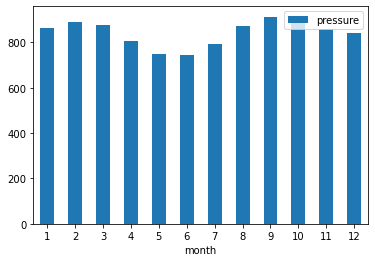

In [9]:
pressure = table_df.groupby(by=['month'])["pressure"].mean()
pressure_df = pd.DataFrame(pressure)
pressure_chart = pressure_df.plot.bar(rot=0)
pressure_chart

In [10]:
table_df.to_csv("WeatherData.csv", index = False)